# NYC Public School

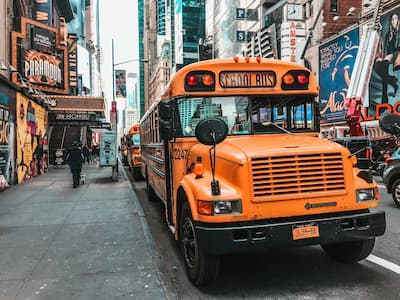

<p>Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - <b>reading</b>, <b>math</b>, and <b>writing</b>, each with a <b>maximum score of 800 points</b>. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend.

You have been provided with a dataset called schools.csv, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.</p>

## Project Instructions

<b>Which NYC schools have the best math results?</b>

- The best math results are at least 80% of the *maximum possible score of 800* for math.
- Save your results in a pandas DataFrame called <b>best_math_schools</b>, including <b>"school_name"</b> and <b>"average_math"</b> columns, <b>sorted by "average_math" in descending order</b>.

<b>What are the top 10 performing schools based on the combined SAT scores?</b>

- Save your results as a pandas DataFrame called <b>top_10_schools</b> containing the <b>"school_name"</b> and a new column named <b>"total_SAT"</b>, with <b>results ordered by "total_SAT" in descending order</b> ("total_SAT" being the sum of math, reading, and writing scores).

<b>Which single borough has the largest standard deviation in the combined SAT score?</b>

- Save your results as a pandas DataFrame called largest_std_dev.
- The DataFrame should contain one row, with:
- >"borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
- >"num_schools" - the number of schools in the borough.
- >"average_SAT" - the mean of "total_SAT".
- >"std_SAT" - the standard deviation of "total_SAT".
- <b>Round all numeric values to two decimal places.</B>

<p><b>note: </b>If you will use this code to DataCamp test, make sure to delete <b>.set_index('school_name')</b> and </p>

### Importing Libraries

In [1]:
import numpy as np #linear Algebra
import pandas as pd #DataFrames

#Data visualization
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [3]:
path="C:\\Users\\ahmed\\Downloads\\schools.csv"
schools=pd.read_csv(path)
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [4]:
#Data shape
schools.shape

(375, 7)

In [5]:
#the description of data
schools.describe().T

,count,mean,std,min,25%,50%,75%,max
average_math,375.0,432.944000,71.952373,317.0,386.00,415.0,458.5,754.0
average_reading,375.0,424.504000,61.881069,302.0,386.00,413.0,445.0,697.0
average_writing,375.0,418.458667,64.548599,284.0,382.00,403.0,437.5,693.0
percent_tested,355.0,64.976338,18.747634,18.5,50.95,64.8,79.6,100.0


In [6]:
#more information about data
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


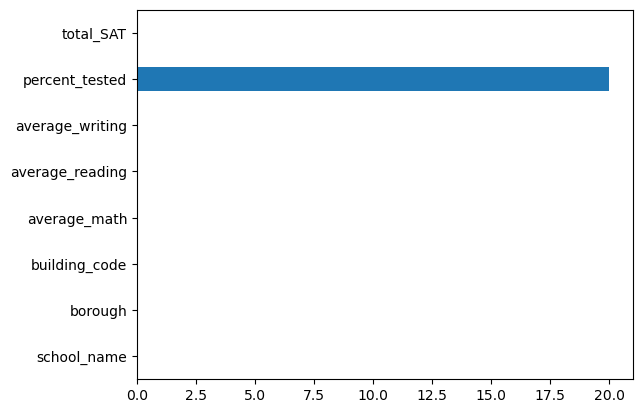

In [251]:
#missing values
schools.isna().sum().plot(kind='barh')
plt.show()

<b>Which NYC schools have the best math results?</b>

- The best math results are at least 80% of the *maximum possible score of 800* for math.
- Save your results in a pandas DataFrame called best_math_schools, including "school_name" and "average_math" columns, sorted by "average_math" in descending order.

In [27]:
best_math_schools=schools[(schools['average_math']/800)*100 >= 80][['school_name','average_math']].set_index('school_name').sort_values('average_math',ascending=False)

In [33]:
best_math_schools

,average_math
school_name,
Stuyvesant High School,754
Bronx High School of Science,714
Staten Island Technical High School,711
Queens High School for the Sciences at York College,701
"High School for Mathematics, Science, and Engineering at City College",683
Brooklyn Technical High School,682
Townsend Harris High School,680
High School of American Studies at Lehman College,669
"New Explorations into Science, Technology and Math High School",657


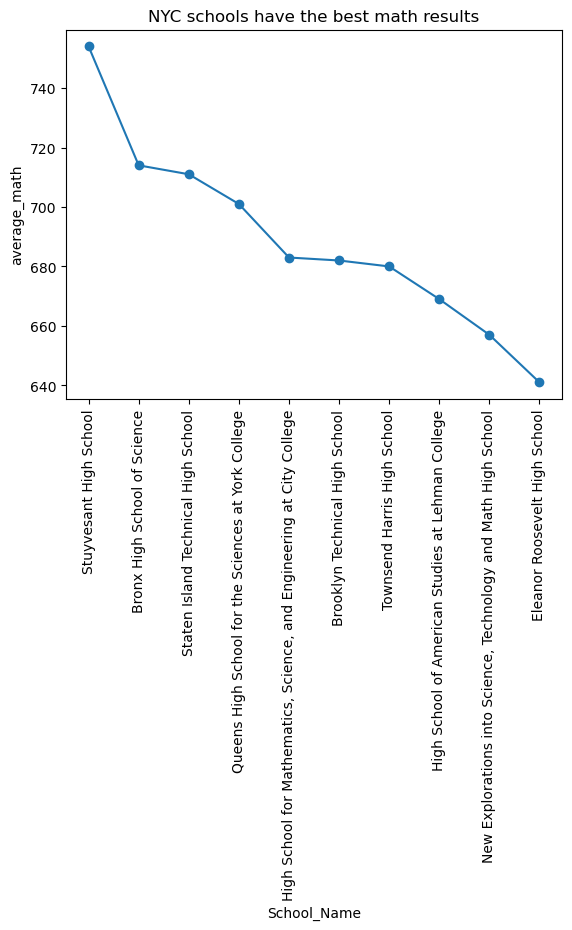

In [104]:
plt.plot(best_math_schools,marker='o')
plt.xlabel('School_Name')
plt.ylabel('average_math')
plt.title('NYC schools have the best math results')
plt.xticks(rotation='vertical')
plt.show()

<b>What are the top 10 performing schools based on the combined SAT scores?</b>

- Save your results as a pandas DataFrame called top_10_schools containing the "school_name" and a new column named "total_SAT", with results ordered by "total_SAT" in descending order ("total_SAT" being the sum of math, reading, and writing scores).

In [57]:
#Adding a new column total_test
for lab,row in schools.iterrows():
    schools.loc[lab,'total_SAT']=np.sum(row[['average_math','average_reading','average_writing']])

In [59]:
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197


In [255]:
top_10_schools=schools[['school_name','total_SAT']].set_index('school_name').sort_values('total_SAT',ascending=False).head(10)

In [257]:
top_10_schools

,total_SAT
school_name,
Stuyvesant High School,2144
Bronx High School of Science,2041
Staten Island Technical High School,2041
High School of American Studies at Lehman College,2013
Townsend Harris High School,1981
Queens High School for the Sciences at York College,1947
Bard High School Early College,1914
Brooklyn Technical High School,1896
Eleanor Roosevelt High School,1889


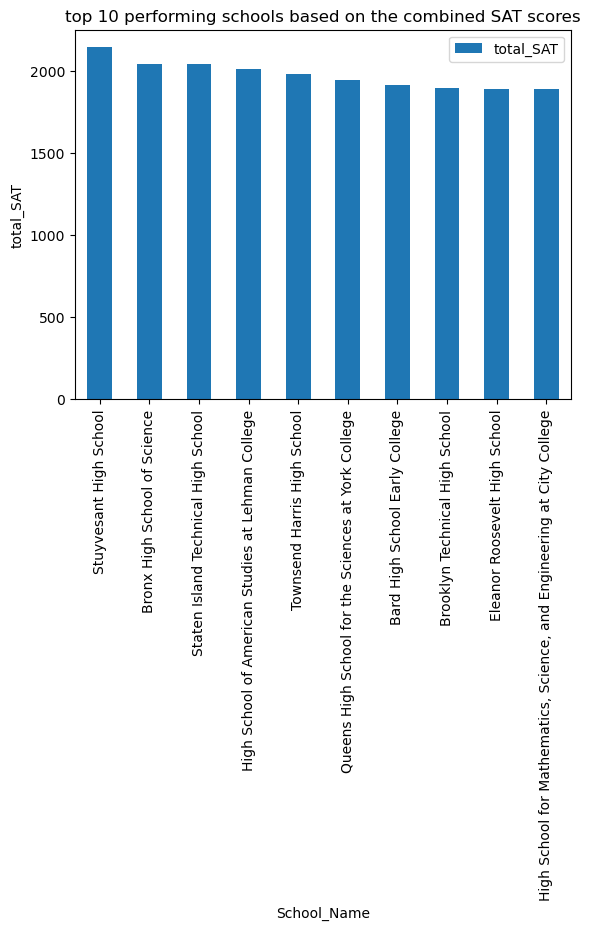

In [259]:
top_10_schools.plot(kind='bar')
plt.xlabel('School_Name')
plt.ylabel('total_SAT')
plt.title('top 10 performing schools based on the combined SAT scores')
plt.show()

<b>Which single borough has the largest standard deviation in the combined SAT score?</b>

- Save your results as a pandas DataFrame called largest_std_dev.
- The DataFrame should contain one row, with:
- >"borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
- >"num_schools" - the number of schools in the borough.
- >"average_SAT" - the mean of "total_SAT".
- >"std_SAT" - the standard deviation of "total_SAT".
- <b>Round all numeric values to two decimal places.</B>

In [156]:
borough=schools.groupby('borough')['total_SAT'].agg(['count','mean','std'])

In [158]:
borough

,count,mean,std
borough,,,
Bronx,98,1202.72449,150.393901
Brooklyn,109,1230.256881,154.868427
Manhattan,89,1340.134831,230.294140
Queens,69,1345.478261,195.252899
Staten Island,10,1439.0,222.303596


In [186]:
borough.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"},inplace=True)

In [188]:
borough

,num_schools,average_SAT,std_SAT
borough,,,
Bronx,98,1202.72449,150.393901
Brooklyn,109,1230.256881,154.868427
Manhattan,89,1340.134831,230.294140
Queens,69,1345.478261,195.252899
Staten Island,10,1439.0,222.303596


In [265]:
largest_std_dev=borough[borough['std_SAT']==borough['std_SAT'].max()].round()

In [267]:
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.134831,230.0
